# Titanic EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
plt.rcParams["figure.dpi"]=80
plt.style.use("ggplot")

## Load the data

In [5]:
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Preprocessing

In [6]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 313.7 KB


In [7]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
cols=data.columns.values
cols

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [9]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

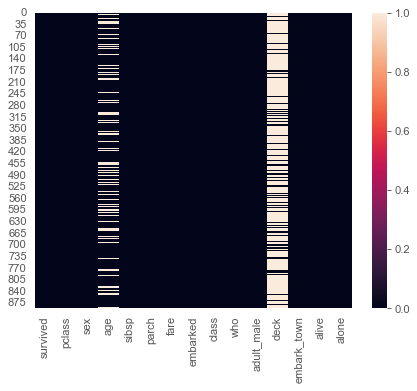

In [13]:
sns.heatmap(data.isna())

<AxesSubplot:>

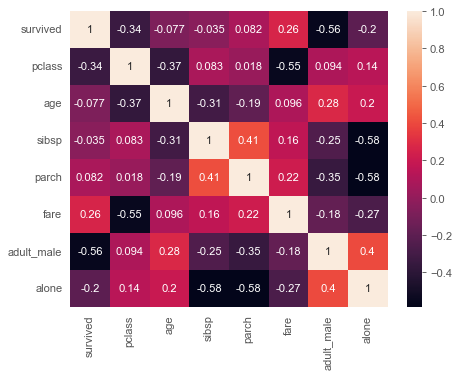

In [15]:
sns.heatmap(data.corr(),annot=True)

## Exploratory Data Analysis

In [20]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


<AxesSubplot:xlabel='fare', ylabel='Count'>

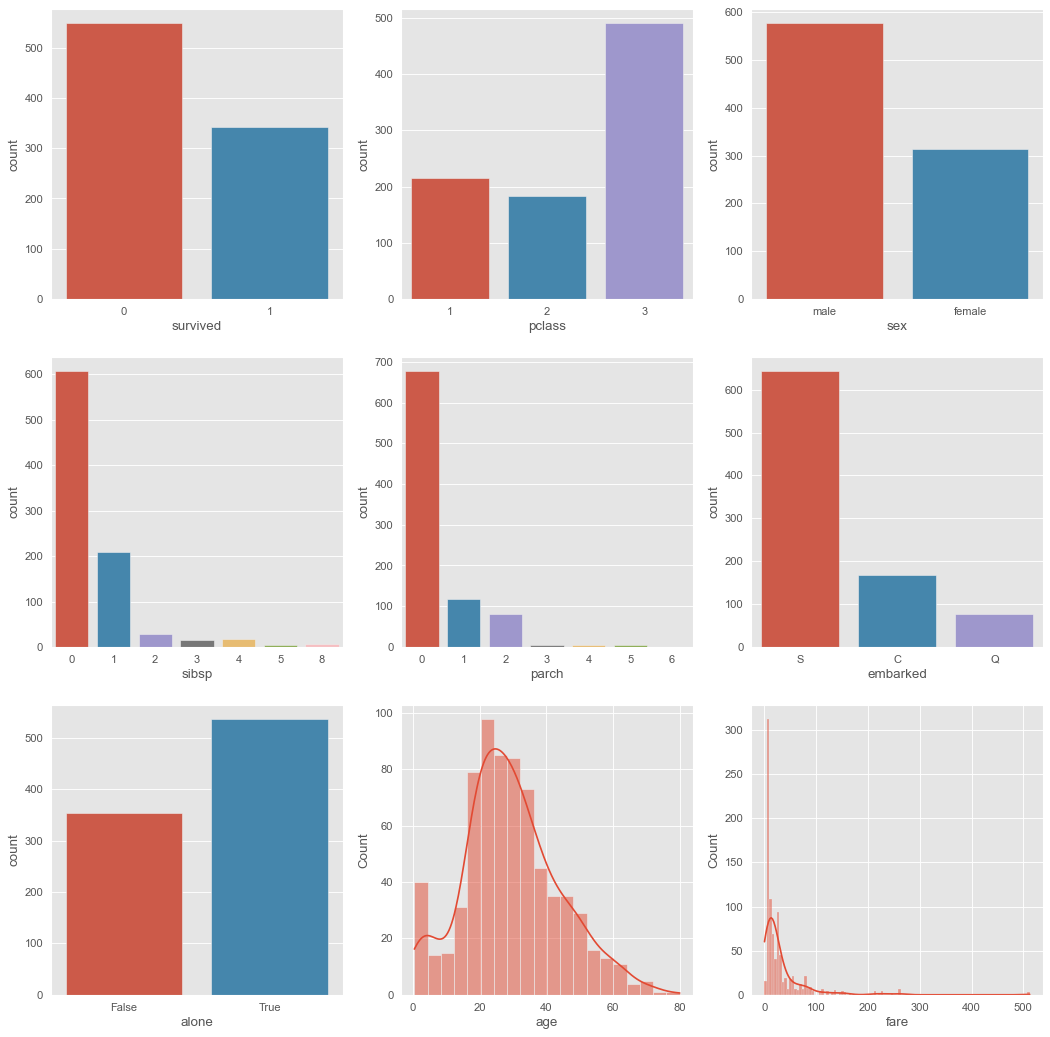

In [41]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
sns.countplot(x=data["survived"],ax=ax[0][0])
sns.countplot(x=data["pclass"],ax=ax[0][1])
sns.countplot(x=data["sex"],ax=ax[0][2])
sns.countplot(x=data["sibsp"],ax=ax[1][0])
sns.countplot(x=data["parch"],ax=ax[1][1])
sns.countplot(x=data["embarked"],ax=ax[1][2])
sns.countplot(x=data["alone"],ax=ax[2][0])
sns.histplot(x=data["age"],ax=ax[2,1],kde=True)
sns.histplot(x=data["fare"],ax=ax[2,2],kde=True)

### Survived

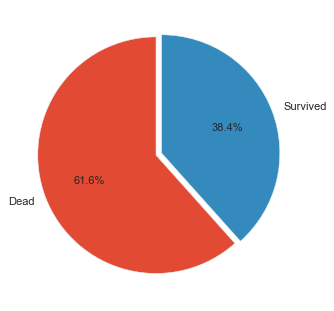

In [50]:
plt.pie(data["survived"].value_counts(),labels=["Dead","Survived"],autopct="%.1f%%",startangle=90,explode=[0,0.05])
plt.show()

More people died

### PClass

In [51]:
data["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

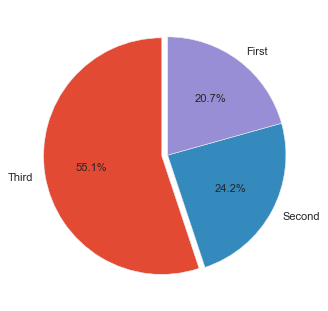

In [60]:
plt.pie(data["pclass"].value_counts(),labels=["Third","Second","First"],autopct="%1.1f%%",startangle=90,explode=[0.05,0,0])
plt.show()

In [52]:
data.groupby(["pclass","survived"]).agg({"survived":"count"})

survived
pclass survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

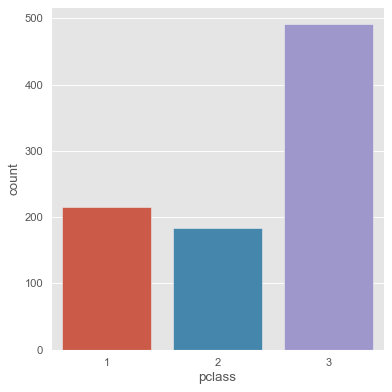

In [67]:
sns.catplot(data=data,x="pclass",kind="count")

More people died in 3rd class compared to survived
As class increases death also decreases

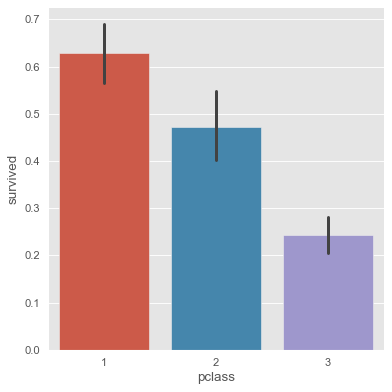

In [65]:
sns.catplot(data=data,x="pclass",y="survived",kind="bar")

Probability of survival is high in First class

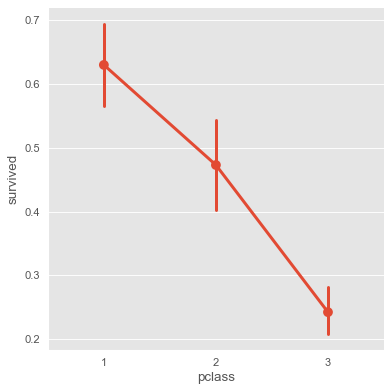

In [64]:
sns.catplot(data=data,x="pclass",y="survived",kind="point")

### Sex

In [69]:
data["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

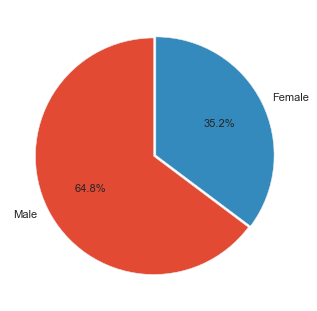

In [72]:
plt.pie(data["sex"].value_counts(),labels=["Male","Female"],explode=[0.02,0],startangle=90,autopct="%1.1f%%")
plt.show()

In [73]:
data.groupby(["sex","survived"]).agg({"survived":"count"})

survived
sex    survived          
female 0               81
       1              233
male   0              468
       1              109

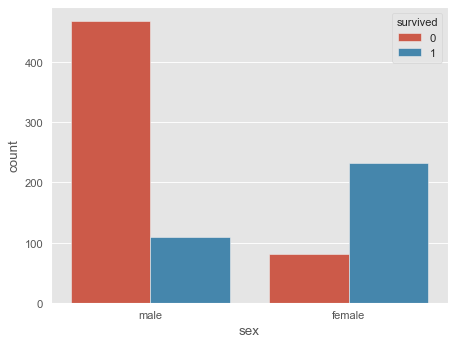

In [76]:
sns.countplot(data=data,x="sex",hue="survived")
plt.show()

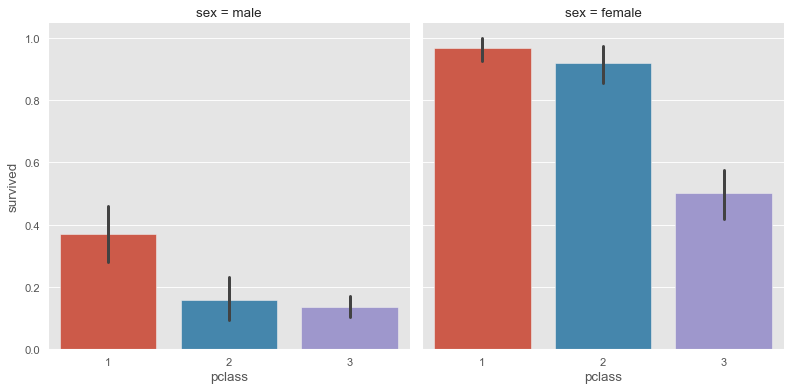

In [84]:
sns.catplot(data=data,x="pclass",y="survived",kind="bar",col="sex")

Even though there are low females
Probability of female surviving is way high

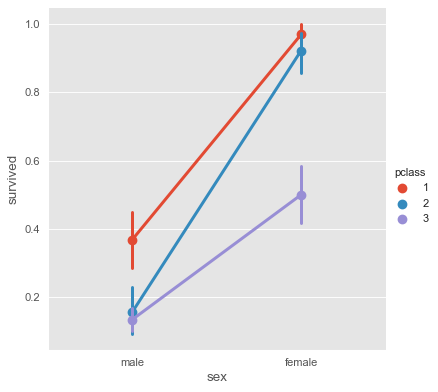

In [88]:
sns.catplot(data=data,x="sex",y="survived",kind="point",hue="pclass")

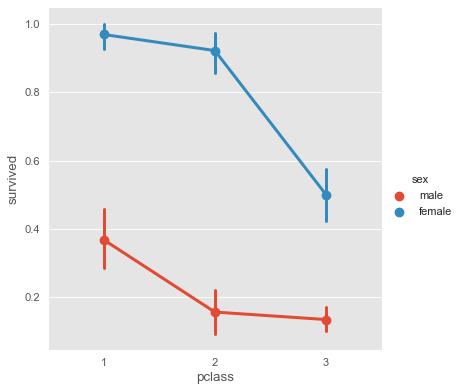

In [89]:
sns.catplot(data=data,x="pclass",y="survived",kind="point",hue="sex")

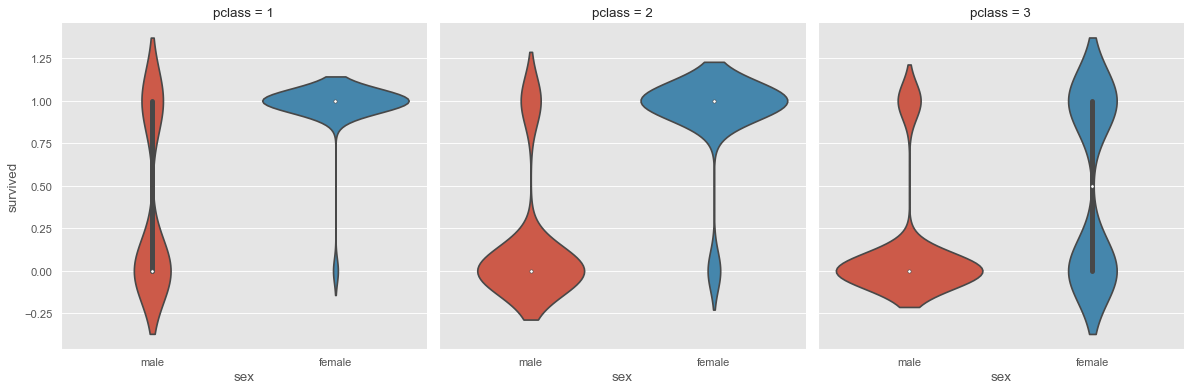

In [90]:
sns.catplot(data=data,x="sex",y="survived",kind="violin",col="pclass")

### Age

In [91]:
data["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

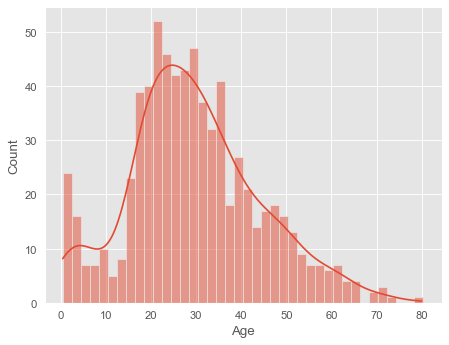

In [101]:
sns.histplot(data=data,x="age",binwidth=2,kde=True)
plt.xlabel("Age")
plt.show()

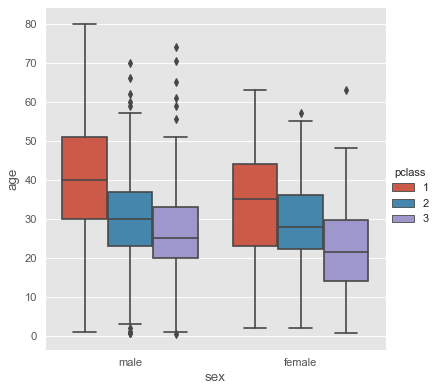

In [123]:
sns.catplot(data=data,y="age",x="sex",kind="box",hue="pclass")

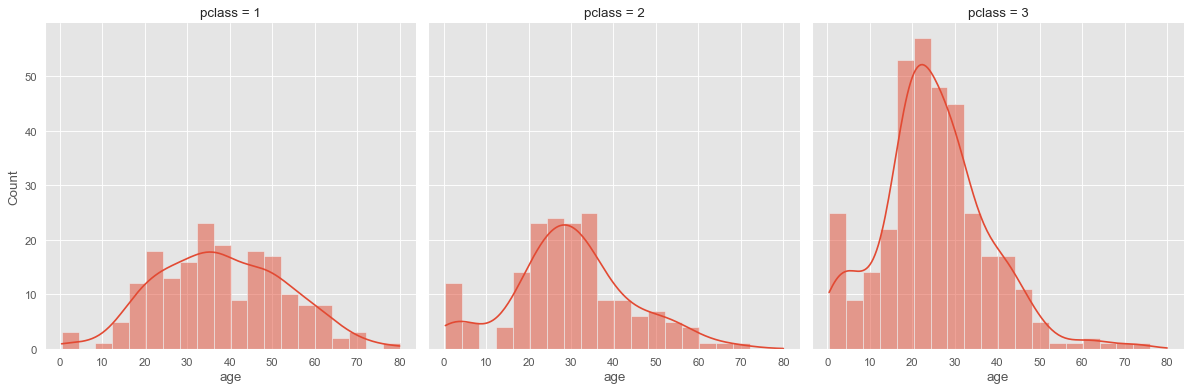

In [122]:
sns.displot(data=data,x="age",col="pclass",kde=True)

There are more young people in 3rd Class

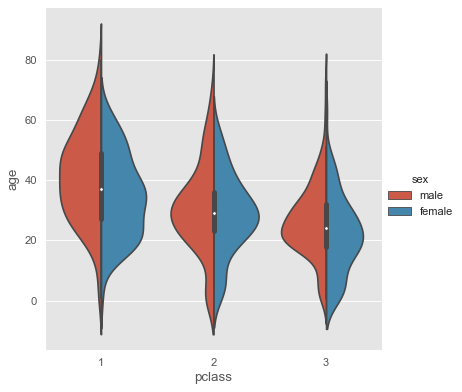

In [135]:
sns.catplot(data=data,x="pclass",y="age",kind="violin",hue="sex",split=True)